In [47]:
import sklearn
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pandas as pd
import numpy as np

In [48]:
bike = pd.read_csv('/content/drive/MyDrive/인프런 - 파이썬 머신러닝 완벽가이드/Files/bike sharing demand/bike_train.csv')
bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [49]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [50]:
bike['datetime'] = bike['datetime'].apply(pd.to_datetime)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [51]:
bike['year'] = bike['datetime'].apply(lambda x : x.year)
bike['month'] = bike['datetime'].apply(lambda x : x.month)
bike['day'] = bike['datetime'].apply(lambda x : x.day)
bike['hour'] = bike['datetime'].apply(lambda x : x.hour)
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [52]:
bike.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

In [53]:
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [78]:
def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y,pred):
  RMSLE = rmsle(y,pred)
  RMSE = rmse(y,pred)
  MAE = mean_absolute_error(y,pred)
  print('RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}'.format(RMSLE, RMSE, MAE))

In [79]:
LR = LinearRegression()
X_data = bike.drop(['count'], axis=1, inplace=False)
y_target = bike['count']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3)

LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

evaluate_regr(y_test, LR_pred)

RMSLE : 1.161, RMSE : 140.879, MAE : 104.952


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
def top_error(y_test, pred, n_tops):
  result_df = pd.DataFrame(data = y_test.values, columns=['real_count'])
  result_df['predict_count'] = np.round(pred)
  result_df['difference'] = np.abs(result_df['real_count']-result_df['predict_count'])
  print(result_df.sort_values(by='difference', ascending=False)[:n_tops])

In [86]:
top_error(y_test, LR_pred, n_tops=10)

      real_count  predict_count  difference
979          834          190.0       644.0
2122         839          202.0       637.0
501          943          358.0       585.0
2377         890          321.0       569.0
2081         970          411.0       559.0
1002         856          307.0       549.0
1871         766          220.0       546.0
500          713          171.0       542.0
2195         925          397.0       528.0
1128         666          144.0       522.0


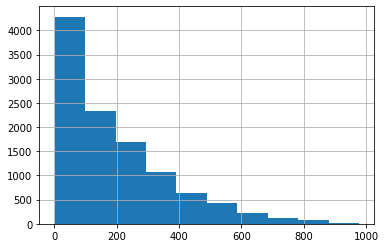

In [87]:
y_target.hist()

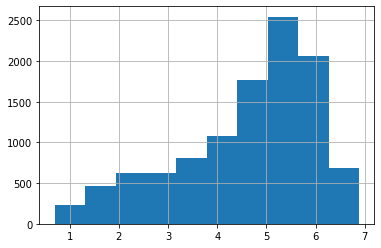

In [89]:
log_y_target = np.log1p(y_target)
log_y_target.hist()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_data, log_y_target, test_size=0.3)

LR = LinearRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# log 값을 다시 정상적인 값으로 변환
exp_y_test = np.expm1(y_test)
exp_LR_pred = np.expm1(LR_pred)

evaluate_regr(exp_y_test, exp_LR_pred)

RMSLE : 1.030, RMSE : 165.298, MAE : 108.996


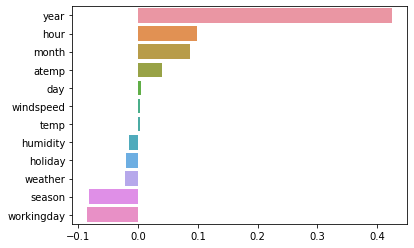

In [98]:
import seaborn as sns

coef = pd.Series(data = LR.coef_, index=X_data.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [99]:
X_data_hot = pd.get_dummies(X_data, columns=['year','month','hour', 'holiday','workingday','season','weather'])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_data_hot, log_y_target, test_size=0.3)

def model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1:
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('######', model.__class__.__name__, '######')
  evaluate_regr(y_test, pred)

In [101]:
LR = LinearRegression()
Lasso = Lasso(alpha=10)
Ridge = Ridge(alpha=0.01)

for model in [LR, Lasso, Ridge]:
  model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

###### LinearRegression ######
RMSLE : 0.590, RMSE : 93.955, MAE : 61.647
###### Lasso ######
RMSLE : 1.428, RMSE : 201.791, MAE : 141.141
###### Ridge ######
RMSLE : 0.590, RMSE : 93.956, MAE : 61.648


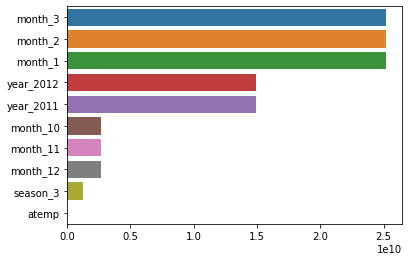

In [102]:
coef = pd.Series(LR.coef_ , index=X_data_hot.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [104]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

RF = RandomForestRegressor(n_estimators = 500)
GB = GradientBoostingRegressor(n_estimators = 500)
XGB = XGBRegressor(n_estimators = 500)
LGBM = LGBMRegressor(n_estimators = 500)

for model in [RF, GB, XGB, LGBM]:
  model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

###### RandomForestRegressor ######
RMSLE : 0.346, RMSE : 49.669, MAE : 30.716
###### GradientBoostingRegressor ######
RMSLE : 0.327, RMSE : 50.656, MAE : 31.768
[07:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
###### XGBRegressor ######
RMSLE : 0.330, RMSE : 50.451, MAE : 31.692
###### LGBMRegressor ######
RMSLE : 0.314, RMSE : 44.298, MAE : 27.676
